<a href="https://colab.research.google.com/github/hemantsahu177/Hotel-Booking-Analysis-/blob/main/Edunet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Load and Clean the Data

In [20]:
import pandas as pd

# Load the dataset
file_path = '/content/hotel_bookings (1).xlsx'
hotel_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
hotel_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Check for Missing Values and Data Types


In [21]:
# Check for missing values
missing_values = hotel_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Inspect data types
print(hotel_data.dtypes)


children         4
country        488
agent        16340
company     112593
dtype: int64
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_cancele

Handle Missing Values and Convert Data Types

In [22]:
# Fill missing values
hotel_data.fillna({
    'children': 0,
    'country': 'Unknown',
    'agent': 0,
    'company': 0
}, inplace=True)

# Convert data types
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
hotel_data['arrival_date_month'] = pd.to_datetime(hotel_data['arrival_date_month'], format='%B').dt.month

# Verify changes
print(hotel_data.isnull().sum())
print(hotel_data.dtypes)


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Exploratory Data Analysis (EDA)

Analyze Seasonal Trends

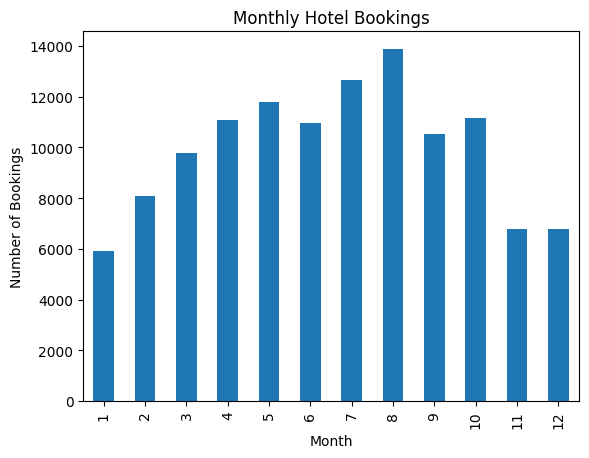

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze booking trends by month
monthly_bookings = hotel_data.groupby('arrival_date_month').size()
monthly_bookings.plot(kind='bar')
plt.title('Monthly Hotel Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()


Optimal Booking Strategy

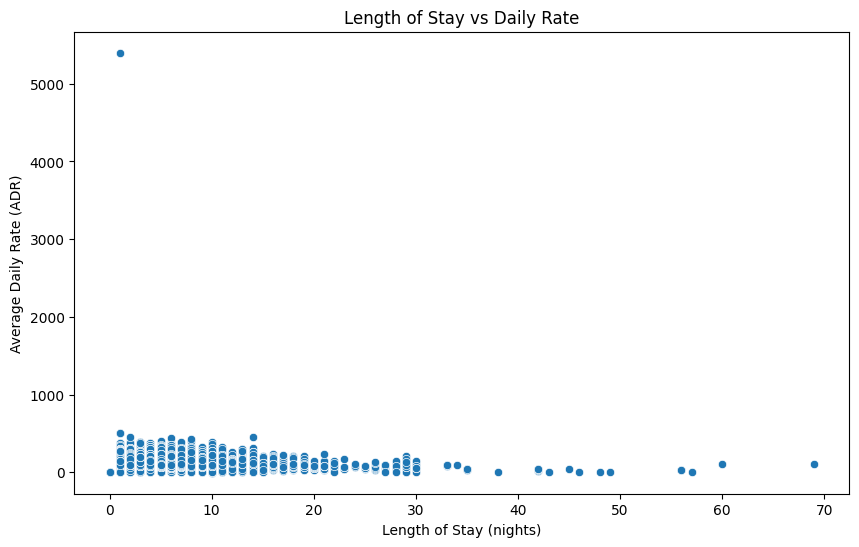

In [24]:
# Calculate length of stay
hotel_data['length_of_stay'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# Plot length of stay vs daily rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_of_stay', y='adr', data=hotel_data)
plt.title('Length of Stay vs Daily Rate')
plt.xlabel('Length of Stay (nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


Customer Segmentation

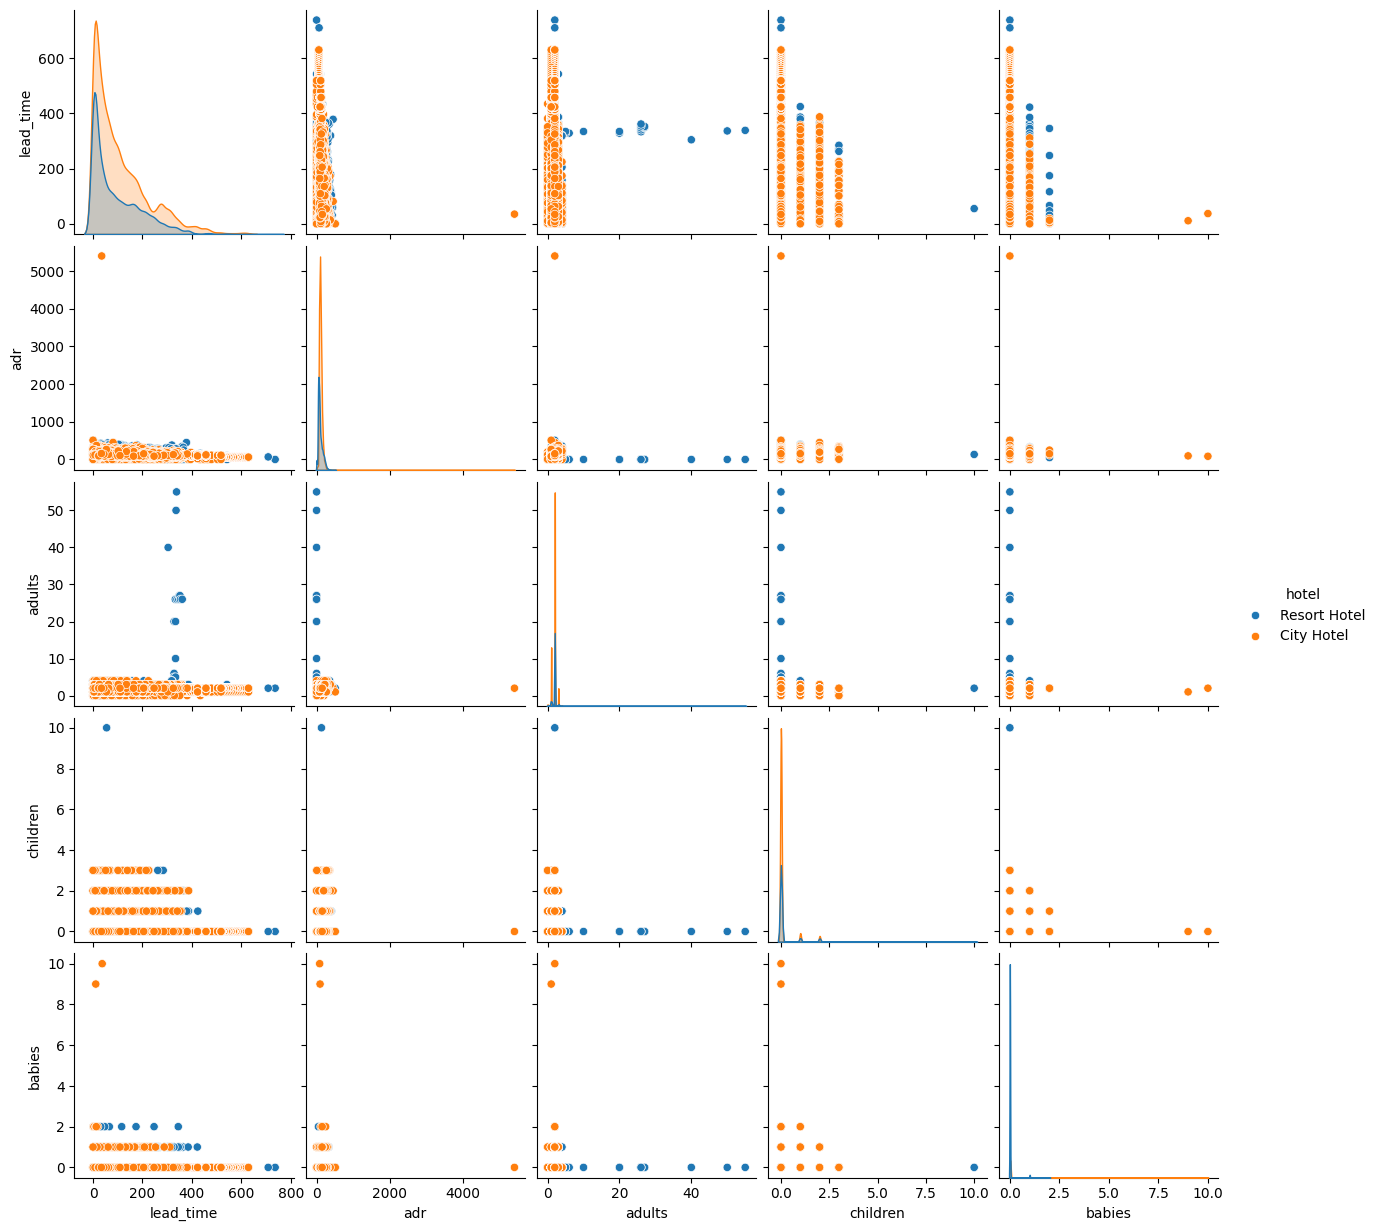

In [25]:
# Customer segmentation based on booking behavior and demographics
sns.pairplot(hotel_data, hue='hotel', vars=['lead_time', 'adr', 'adults', 'children', 'babies'])
plt.show()


Special Requests Analysis

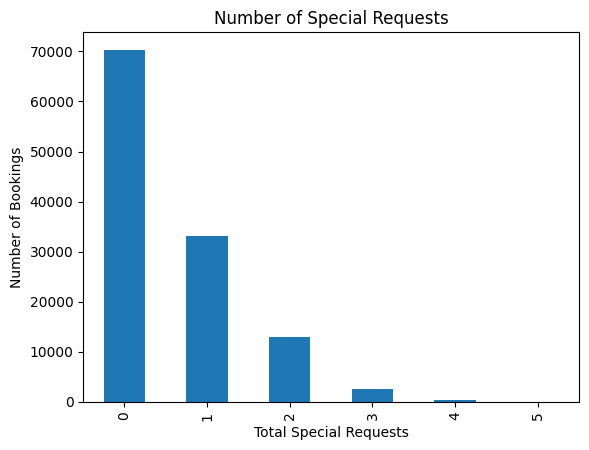

In [26]:
# Analyze the number of special requests
special_requests = hotel_data.groupby('total_of_special_requests').size()
special_requests.plot(kind='bar')
plt.title('Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Number of Bookings')
plt.show()


Feature Engineering

In [28]:
# Ensure 'arrival_date' column is in datetime format
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date_year'].astype(str) + '-' + hotel_data['arrival_date_month'].astype(str) + '-' + hotel_data['arrival_date_day_of_month'].astype(str))

# Add 'arrival_date_day_of_week' feature
hotel_data['arrival_date_day_of_week'] = hotel_data['arrival_date'].dt.dayofweek

# Create new features
hotel_data['is_weekend'] = hotel_data['arrival_date_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
hotel_data['total_guests'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

# Verify the new columns
print(hotel_data[['arrival_date', 'arrival_date_day_of_week', 'is_weekend', 'total_guests']].head())


  arrival_date  arrival_date_day_of_week  is_weekend  total_guests
0   2015-07-01                         2           0           2.0
1   2015-07-01                         2           0           2.0
2   2015-07-01                         2           0           1.0
3   2015-07-01                         2           0           1.0
4   2015-07-01                         2           0           2.0


In [29]:
# Ensure 'arrival_date' column is in datetime format
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date_year'].astype(str) + '-' + hotel_data['arrival_date_month'].astype(str) + '-' + hotel_data['arrival_date_day_of_month'].astype(str))

# Add 'arrival_date_day_of_week' feature
hotel_data['arrival_date_day_of_week'] = hotel_data['arrival_date'].dt.dayofweek

# Create new features
hotel_data['is_weekend'] = hotel_data['arrival_date_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
hotel_data['total_guests'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

# Verify the new columns
new_columns = hotel_data[['arrival_date', 'arrival_date_day_of_week', 'is_weekend', 'total_guests']].head()
new_columns


,arrival_date,arrival_date_day_of_week,is_weekend,total_guests
0,2015-07-01,2,0,2.0
1,2015-07-01,2,0,2.0
2,2015-07-01,2,0,1.0
3,2015-07-01,2,0,1.0
4,2015-07-01,2,0,2.0


Predictive Modeling

Accuracy: 0.62


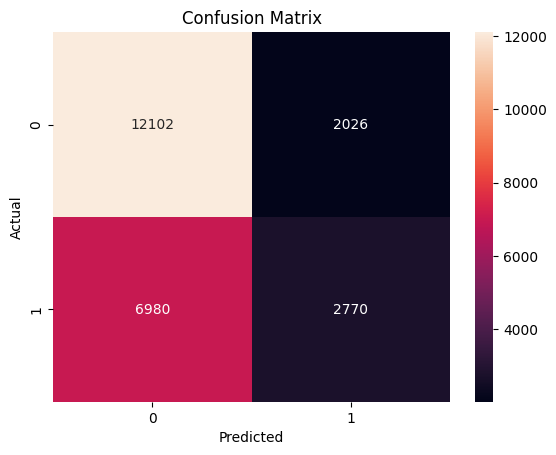

Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.86      0.73     14128
        True       0.58      0.28      0.38      9750

    accuracy                           0.62     23878
   macro avg       0.61      0.57      0.55     23878
weighted avg       0.61      0.62      0.59     23878

Feature Importance:
adr                        0.265531
adults                     0.172534
babies                     0.154550
total_guests               0.130409
stays_in_week_nights       0.104686
stays_in_weekend_nights    0.067926
is_weekend                 0.035919
children                  -0.050117
lead_time                 -0.293939
dtype: float64


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# file_path = 'path_to_your_file/hotel_bookings (1).xlsx'
# hotel_data = pd.read_excel(file_path)

# Ensure 'arrival_date' column is in datetime format
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date_year'].astype(str) + '-' + hotel_data['arrival_date_month'].astype(str) + '-' + hotel_data['arrival_date_day_of_month'].astype(str))

# Add 'arrival_date_day_of_week' feature
hotel_data['arrival_date_day_of_week'] = hotel_data['arrival_date'].dt.dayofweek

# Create new features
hotel_data['is_weekend'] = hotel_data['arrival_date_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
hotel_data['total_guests'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

# Features aur target select karna
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr', 'is_weekend', 'total_guests']
X = hotel_data[features]
y = hotel_data['total_of_special_requests'] > 0

# Data ko train aur test sets me split karna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data ko scale karna
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model train karna with increased iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Test data par predictions lena aur accuracy calculate karna
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix plot karna
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report print karna
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Feature Importance print karna
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)
